In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import random

from tqdm import tqdm

from sklearn.model_selection import train_test_split

#### Reads Dataset

In [2]:
# reads YELP reviews dataset
line_count = len(open("yelp_dataset/review.json", encoding = "utf8").readlines())
user_ids, business_ids, stars, dates, text, useful, funny, cool = [], [], [], [], [], [], [], []

with open("yelp_dataset/review.json", encoding = "utf8") as f:
    for line in tqdm(f, total=line_count):
        blob = json.loads(line)
        user_ids += [blob["user_id"]]
        business_ids += [blob["business_id"]]
        stars += [blob["stars"]]
        dates += [blob["date"]]
        text += [blob["text"]]
        useful += [blob["useful"]]
        funny += [blob["funny"]]
        cool += [blob["cool"]]

ratings = pd.DataFrame(
    {"user_id": user_ids, "business_id": business_ids, "text": text, "rating": stars, "date": dates,
     "useful": useful, "funny": funny, "cool": cool})

100%|█████████████████████████████████████████████████████████████████████| 8021122/8021122 [01:32<00:00, 86337.32it/s]


In [3]:
# delete unused variables
del user_ids, business_ids, stars, dates, text, useful, funny, cool

In [4]:
ratings.head()

,user_id,business_id,text,rating,date,useful,funny,cool
0,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,"As someone who has worked with many museums, I...",2.0,2015-04-15 05:21:16,5,0,0
1,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,I am actually horrified this place is still in...,1.0,2013-12-07 03:16:52,1,1,0
2,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,I love Deagan's. I do. I really do. The atmosp...,5.0,2015-12-05 03:18:11,1,0,0
3,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",1.0,2011-05-27 05:30:52,0,0,0
4,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,"Oh happy day, finally have a Canes near my cas...",4.0,2017-01-14 21:56:57,0,0,0


In [5]:
# reads business dataset
business = pd.read_json("yelp_dataset/business.json", encoding = 'utf-8', lines = True)
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",None
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,None,"Pets, Pet Services, Pet Groomers",None
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Hardware Stores, Home Services, Building Suppl...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ..."
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '..."


In [6]:
# reads user dataset
line_count = len(open("yelp_dataset/user.json", encoding = "utf8").readlines())
user_ids, name, review_count, yelping_since, friends, useful, funny, cool, fans, elite, average_stars = \
    [], [], [], [], [], [], [], [], [], [], []

with open("yelp_dataset/user.json", encoding = "utf8") as f:
    for line in tqdm(f, total=line_count):
        blob = json.loads(line)
        user_ids += [blob["user_id"]]
        name += [blob["name"]]
        review_count += [blob["review_count"]]
        yelping_since += [blob["yelping_since"]]
        friends += [len(blob["friends"])]
        useful += [blob["useful"]]
        funny += [blob["funny"]]
        cool += [blob["cool"]]
        fans += [blob["fans"]]
        elite += [blob["elite"]]
        average_stars += [blob["average_stars"]]

user = pd.DataFrame(
    {"user_id": user_ids, "name": name, "review_count": review_count, "yelping_since": yelping_since, 
     "friends": friends, "useful": useful, "funny": funny, "cool": cool, "fans": fans, "elite": elite,
     "average_stars": average_stars})

user_orig = user.copy()

100%|█████████████████████████████████████████████████████████████████████| 1968703/1968703 [00:40<00:00, 48918.89it/s]


In [7]:
del user_ids, name, review_count, yelping_since, friends, useful, funny, cool, fans, elite, average_stars

In [8]:
user.head()

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,average_stars
0,ntlvfPzc8eglqvk92iDIAw,Rafael,553,2007-07-06 03:27:11,1078,628,225,227,14,,3.57
1,FOBRPlBHa3WPHFB5qYDlVg,Michelle,564,2008-04-28 01:29:25,5110,790,316,400,27,"2008,2009,2010,2011,2012,2013",3.84
2,zZUnPeh2hEp0WydbAZEOOg,Martin,60,2008-08-28 23:40:05,838,151,125,103,5,2010,3.44
3,QaELAmRcDc5TfJEylaaP8g,John,206,2008-09-20 00:08:14,4150,233,160,84,6,2009,3.08
4,xvu8G900tezTzbbfqmTKvA,Anne,485,2008-08-09 00:30:27,21478,1265,400,512,78,"2009,2010,2011,2012,2014,2015,2016,2017,2018",4.37


In [9]:
print('Ratings shape: ', ratings.shape)
print('Business shape: ', business.shape)
print('User shape: ', user.shape)

Ratings shape:  (8021122, 8)
Business shape:  (209393, 14)
User shape:  (1968703, 11)


### Filtering

#### Filter by business first

In [10]:
### Only US Businesses
# Canada has 6 letter zips, US has 5 digits zips
def find_country(x):
    if len(x.strip()) == 5:
        return 'US'
    else:
        return 'CA'
    
business['country'] = business['postal_code'].apply(lambda x: find_country(x)) 

US Businesses:  153583
CA Businesses:  55810
% of US business:  73.34676899418797


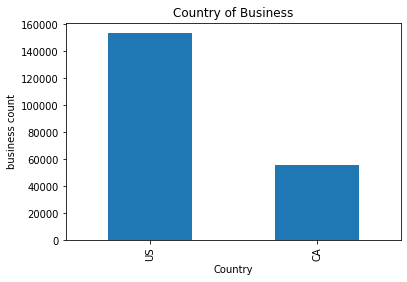

In [11]:
business['country'].value_counts().plot(kind = 'bar')
plt.title('Country of Business')
plt.xlabel('Country')
plt.ylabel('business count');

us_count = business['country'].value_counts()[0]
ca_count = business['country'].value_counts()[1]
print('US Businesses: ', us_count)
print('CA Businesses: ', ca_count)
print('% of US business: ', us_count * 100 / (us_count + ca_count))

In [12]:
# filter only US businesses
business = business[business['country'] == 'US']

Business Open:  124994
Business Closed:  28589
% of open business:  81.38530957202295


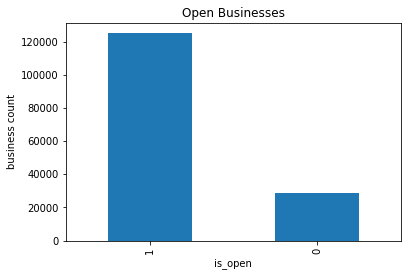

In [13]:
### Open businesses
business['is_open'].value_counts().plot(kind = 'bar')
plt.title('Open Businesses')
plt.xlabel('is_open')
plt.ylabel('business count');

bus_open = business['is_open'].value_counts()[1]
bus_closed = business['is_open'].value_counts()[0]
print('Business Open: ', bus_open)
print('Business Closed: ', bus_closed)
print('% of open business: ', bus_open * 100 / (bus_open + bus_closed))

In [14]:
# filter the open businesses
business = business[business['is_open'] == 1]

In [15]:
### Review Count distribution
for i in range(30):
    temp = business[business['review_count'] <= i + 1]
    print('Businesses with less than eq ' + str(i + 1) + ' reviews: ', temp.shape[0]) 

Businesses with less than eq 1 reviews:  0
Businesses with less than eq 2 reviews:  0
Businesses with less than eq 3 reviews:  18578
Businesses with less than eq 4 reviews:  29170
Businesses with less than eq 5 reviews:  37310
Businesses with less than eq 6 reviews:  43946
Businesses with less than eq 7 reviews:  49459
Businesses with less than eq 8 reviews:  54116
Businesses with less than eq 9 reviews:  58224
Businesses with less than eq 10 reviews:  61875
Businesses with less than eq 11 reviews:  65007
Businesses with less than eq 12 reviews:  67734
Businesses with less than eq 13 reviews:  70178
Businesses with less than eq 14 reviews:  72385
Businesses with less than eq 15 reviews:  74455
Businesses with less than eq 16 reviews:  76288
Businesses with less than eq 17 reviews:  77951
Businesses with less than eq 18 reviews:  79578
Businesses with less than eq 19 reviews:  81084
Businesses with less than eq 20 reviews:  82463
Businesses with less than eq 21 reviews:  83780
Businesse

In [16]:
# Only take businesses with greater than 30 reviews
business = business[business['review_count'] > 30]

In [17]:
### Filter 
df_explode = business.assign(categories = business.categories.str.split(', ')).explode('categories')
df_explode.categories.value_counts()

Restaurants              15582
Food                      6703
Nightlife                 4222
Bars                      3875
Shopping                  3566
                         ...  
Free Diving                  1
Neurotologists               1
Machine & Tool Rental        1
Vascular Medicine            1
Street Art                   1
Name: categories, Length: 1142, dtype: int64

In [18]:
# top 100 desired categories which are restaurant/bars etc
desired_categories = ['Restaurants', 'Food', 'Bars', 'American (Traditional)', 'Fast Food', 'Sandwiches', 'Coffee & Tea',
                      'Breakfast & Brunch', 'Pizza', 'Burgers', 'Mexican', 'American (New)', 'Italian', 'Chinese',
                      'Specialty Food', 'Desserts', 'Salad', 'Bakeries', 'Cafes', 'Chicken Wings', 
                      'Ice Cream & Frozen Yogurt', 'Pubs', 'Sushi Bars', 'Asian Fusion', 'Wine & Spirits', 'Beer',
                      'Steakhouses', 'Juice Bars & Smoothies', 'Delis', 'Barbeque', 'Cocktail Bars', 'Mediterranean',
                      'Canadian (New)', 'Diners', 'Thai', 'Wine Bars', 'Indian', 'Vietnamese', 'Vegetarian', 'Soup',
                      'Middle Eastern', 'Tacos', 'Vegan', 'Comfort Food', 'Korean', 'Tex-Mex', 'Greek', 'Ethnic Food',
                      'Buffets', 'Food Delivery Services', 'French', 'Donuts', 'Bubble Tea', 'Beer Bar', 'Noodles',
                      'Food Trucks', 'Gastropubs', 'Bagels', 'Chicken Shop', 'Hot Dogs', 'Halal', 'Latin American',
                      'Southern', 'Tapas/Small Plates', 'Caribbean', 'Tea Rooms', 'Ramen', 'Tapas Bars', 'Pakistani',
                      'Imported Food', 'Cupcakes', 'Dim Sum', 'Fish & Chips', 'Taiwanese', 'Poke', 'Cajun/Creole',
                      'Soul Food', 'Portuguese', 'Filipino', 'Lebanese', 'Brewpubs', 'Acai Bowls', 'Persian/Iranian',
                      'British', 'Waffles', 'Spanish', 'Gelato', 'Falafel', 'Irish Pub', 'Cantonese', 'Brasseries',
                      'Hot Pot', 'African', 'Turkish', 'Szechuan', 'Pan Asian', 'Kebab', 'Afghan', 'New Mexican Cuisine',
                      'Salvadoran']

In [19]:
# filter by desired businesses only Restaurant/Bars
desired_bus = np.unique(df_explode[df_explode['categories'].isin(desired_categories)]['business_id'])
business = business[business['business_id'].isin(desired_bus)]

In [20]:
print('Final Business Shape: ', business.shape)

Final Business Shape:  (18403, 15)


#### Filter by ratings

In [21]:
ratings.head()

,user_id,business_id,text,rating,date,useful,funny,cool
0,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,"As someone who has worked with many museums, I...",2.0,2015-04-15 05:21:16,5,0,0
1,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,I am actually horrified this place is still in...,1.0,2013-12-07 03:16:52,1,1,0
2,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,I love Deagan's. I do. I really do. The atmosp...,5.0,2015-12-05 03:18:11,1,0,0
3,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",1.0,2011-05-27 05:30:52,0,0,0
4,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,"Oh happy day, finally have a Canes near my cas...",4.0,2017-01-14 21:56:57,0,0,0


In [22]:
# filter by our our filtered business
ratings = ratings[ratings['business_id'].isin(business['business_id'])]

# copy so that we can write database to firebase
ratings_orig = ratings.copy()

In [23]:
# group by review count by users
user_counts = pd.DataFrame(ratings['user_id'].value_counts())
user_counts

,user_id
ELcQDlf69kb-ihJfxZyL0A,1330
bLbSNkLggFnqwNNzzq-Ijw,1307
U4INQZOPSUaj8hMjLlZ3KA,1029
PKEzKWv_FktMm2mGPjwd0Q,953
DK57YibC5ShBmqQl97CKog,930
...,...
ya2KkutVSJkFPAX8tpxdpA,1
8s9ozU8of1KDF9WcCLtbjg,1
sig4MM0CxzkZLKzdcV1FIA,1
LdR2GNF3QsZ_UcX2PQjHlg,1


In [24]:
### User Review Count distribution
for i in range(30):
    print('Users with with less than eq ' + str(i + 1) + ' reviews: ', 
          user_counts[user_counts['user_id'] <= (i+1)].shape[0]) 

Users with with less than eq 1 reviews:  648088
Users with with less than eq 2 reviews:  837281
Users with with less than eq 3 reviews:  926837
Users with with less than eq 4 reviews:  978954
Users with with less than eq 5 reviews:  1012130
Users with with less than eq 6 reviews:  1035367
Users with with less than eq 7 reviews:  1052110
Users with with less than eq 8 reviews:  1064664
Users with with less than eq 9 reviews:  1074281
Users with with less than eq 10 reviews:  1082019
Users with with less than eq 11 reviews:  1088307
Users with with less than eq 12 reviews:  1093454
Users with with less than eq 13 reviews:  1097668
Users with with less than eq 14 reviews:  1101284
Users with with less than eq 15 reviews:  1104276
Users with with less than eq 16 reviews:  1106925
Users with with less than eq 17 reviews:  1109200
Users with with less than eq 18 reviews:  1111107
Users with with less than eq 19 reviews:  1112882
Users with with less than eq 20 reviews:  1114436
Users with wi

In [25]:
# just take those who have more than 30 reviews to simplify dataset
desired_user = list(user_counts[user_counts['user_id'] > 30].index)
ratings = ratings[ratings['user_id'].isin(desired_user)]

In [26]:
### filter again by business review counts
temp = pd.DataFrame(ratings['business_id'].value_counts())

### Business Review Count distribution
for i in range(30):
    print('Business with with less than eq ' + str(i + 1) + ' reviews: ', 
          temp[temp['business_id'] <= (i+1)].shape[0]) 

Business with with less than eq 1 reviews:  64
Business with with less than eq 2 reviews:  191
Business with with less than eq 3 reviews:  436
Business with with less than eq 4 reviews:  773
Business with with less than eq 5 reviews:  1198
Business with with less than eq 6 reviews:  1676
Business with with less than eq 7 reviews:  2195
Business with with less than eq 8 reviews:  2812
Business with with less than eq 9 reviews:  3385
Business with with less than eq 10 reviews:  3952
Business with with less than eq 11 reviews:  4512
Business with with less than eq 12 reviews:  5069
Business with with less than eq 13 reviews:  5550
Business with with less than eq 14 reviews:  6051
Business with with less than eq 15 reviews:  6499
Business with with less than eq 16 reviews:  6941
Business with with less than eq 17 reviews:  7357
Business with with less than eq 18 reviews:  7750
Business with with less than eq 19 reviews:  8155
Business with with less than eq 20 reviews:  8512
Business with 

In [27]:
desired_business = list(temp[temp['business_id'] > 30].index)
ratings = ratings[ratings['business_id'].isin(desired_business)]

In [28]:
ratings.shape

(609288, 8)

In [29]:
ratings['rating'].value_counts()

4.0    216471
5.0    216063
3.0    103884
2.0     45514
1.0     27356
Name: rating, dtype: int64

In [30]:
# filter user data only found in ratings
user = user[user['user_id'].isin(ratings['user_id'])]

### Subsample Dataset

In [31]:
print('Final Ratings Shape: ', ratings.shape)
print('Final Business Shape: ', business.shape)
print('Final User Shape: ', user.shape)

Final Ratings Shape:  (609288, 8)
Final Business Shape:  (18403, 15)
Final User Shape:  (11890, 11)


In [32]:
# reset the index
ratings = ratings.reset_index(drop = True)
business = business.reset_index(drop = True)
user = user.reset_index(drop = True)

In [33]:
subsample_index = []

# set seed
random.seed(42)

# number to subsample from each class
num_samples = 20000

# subsample
for i in range(5):
    curr_rat_idx = list(ratings[ratings['rating'] == i+1].index)
    sampling = random.sample(curr_rat_idx, num_samples)
    subsample_index.extend(sampling)

In [34]:
# filter the ratings to take only the subsampled indexes
ratings = ratings[ratings.index.isin(subsample_index)]

In [35]:
ratings.head()

,user_id,business_id,text,rating,date,useful,funny,cool
8,ffMc-TmUUhEbj5LLNILB4A,4ZbRwCB9oGibxK21MUZKHA,I went into this store yesterday and it was ho...,1.0,2018-08-04 22:27:08,1,0,0
33,YpGt3hdq5adPlEFn9fQ2Zw,xzj6q131hJE59tBkhe3Gag,A real cozy spot to grab some Greek. \n\nIt's ...,4.0,2016-10-13 21:19:20,7,5,5
40,SS3sFA9ksCT9bjocM3Wbug,ID5wWJ9C7G0hfbQilvlfxA,I've been here several times over the last 3 y...,1.0,2017-04-07 22:23:58,0,0,0
42,ArAyrioD75AC01DF-Jo1DQ,d_q4avZYM1sOlQP7noJKVg,After hearing about people rave about this pla...,1.0,2018-08-04 20:32:30,0,0,0
44,YcaZNr4HQ5f3ihajDQQLJw,5eV8oUGdBXylwB7HeaDFOA,Absolutely FANTASTIC!!!! The service was a+++!...,5.0,2017-07-08 17:21:45,0,0,0


In [36]:
# reset rating index
ratings = ratings.reset_index(drop = True)

In [37]:
# store labels
labels = ratings['rating']

# drop unneeded columns
ratings.drop(['date', 'rating', 'useful', 'funny', 'cool'], axis = 1, inplace = True)

In [38]:
# perform train test splits
X_train, X_test, y_train, y_test = train_test_split(ratings, labels, test_size=0.1, random_state=42)

In [39]:
# join back to dataset
X_train['rating'] = y_train
X_test['rating'] = y_test

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [40]:
X_train.head()

,user_id,business_id,text,rating
51994,fpwNTbqB1vNtII-Hz0Eh4w,l4pAkHCVUKAcDvo-iNSbYA,First time here and first time trying poke. Mu...,5.0
77540,HiG6LXRmD42EPsLG7IpDMA,XxXmyN3tlroRQ1SOoSXHAA,2nd review for what used to be one of our favo...,1.0
16382,EgUGBGTJUvFJgHyFwgpD1w,wu5nk3pY1e_ou_Le_U52Sw,I love Cheba Hut it's definitely my go-to for ...,4.0
83439,KxGeqg5ccByhaZfQRI4Nnw,M5gj8a6Qtjy06lh3L5zUqA,Great old-school Resort in the Phoenix Paradis...,5.0
61618,_jYEC7fvqTxu5R2jhk_NDQ,eS29S_06lvsDW04wVrIVxg,Well...the guacamole's good. That's about all...,2.0


In [41]:
training = {}
test = {}

# enumerate training
for i in range(X_train.shape[0]):
    training[str(i)] = {'user_id': X_train.iloc[i,0],
                        'business_id': X_train.iloc[i,1],
                        'text': X_train.iloc[i,2],
                        'rating': X_train.iloc[i,3]}

# enumerate testing
for i in range(X_test.shape[0]):
    test[str(i)] = {'user_id': X_test.iloc[i,0],
                        'business_id': X_test.iloc[i,1],
                        'text': X_test.iloc[i,2],
                        'rating': X_test.iloc[i,3]}    

In [42]:
# write to file
with open('dataset/train.json', 'w') as fp:
    json.dump(training, fp, indent = 4)
with open('dataset/test.json', 'w') as fp:
    json.dump(test, fp, indent = 4)

In [43]:
# write small file
train_small = {}
test_small = {}

for i in range(10000):
    train_small[str(i)] = training[str(i)]

for i in range(1000):
    test_small[str(i)] = test[str(i)]

# write to file
with open('dataset/train_small.json', 'w') as fp:
    json.dump(train_small, fp, indent = 4)
with open('dataset/test_small.json', 'w') as fp:
    json.dump(test_small, fp, indent = 4)

### Write data for firebase. (use ratings_orig)

In [44]:
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,country
0,Mmd5WDFq9hHcQ3uClngGjQ,Irene's Tap Room,1227 E Northern Ave,Phoenix,AZ,85020,33.552790,-112.055400,4.5,79,1,"{'WiFi': 'u'free'', 'NoiseLevel': 'u'average''...","Bars, Arts & Entertainment, Nightlife, Music V...","{'Monday': '0:0-0:0', 'Tuesday': '15:0-0:0', '...",US
1,ZkzutF0P_u0C0yTulwaHkA,Lelulos Pizzeria,311 Unity Center Rd,Plum,PA,15239,40.489996,-79.779288,4.0,31,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Restaurants, Pizza","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ...",US
2,7j0kor_fkeYhyEpXh4OpnQ,Scramblers - Strongsville,16726 Pearl Rd,Strongsville,OH,44136,41.295689,-81.835722,3.5,81,1,"{'BusinessAcceptsCreditCards': 'True', 'Ambien...","Breakfast & Brunch, Restaurants, American (Tra...","{'Monday': '6:30-15:0', 'Tuesday': '6:30-15:0'...",US
3,j9bWpCRwpDVfwVT_V85qeA,Papaya Thai,2706 E University Dr,Mesa,AZ,85213,33.423705,-111.772890,2.5,130,1,"{'Caters': 'False', 'OutdoorSeating': 'False',...","Food, Ethnic Food, Specialty Food, Restaurants...","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",US
4,MTx-Zdl_KcU_z9G832XAjg,Taco Bell,8033 N Durango Dr,Las Vegas,NV,89131,36.307495,-115.279059,2.5,37,1,"{'OutdoorSeating': 'False', 'Alcohol': 'u'none...","Fast Food, Restaurants",None,US


In [45]:
random.seed(42)

# number to subsample for businesses
num_samples = 100
sampling = random.sample(list(range(business.shape[0])), num_samples)

collections_arr = []
for idx, i in enumerate(sampling):
    temp = {}
    temp["id"] = idx
    for j, col_name in enumerate(list(business.columns)):
        if col_name != 'attributes':
            temp[col_name] = business.iloc[i, j]
        else:
            # replace u' and ' 
            dict_encoded = {k: str(v).replace("u'", "").replace("'", "") for k,v in business.iloc[i,j].items()}
            temp[col_name] = dict_encoded
    temp["photo"] = "http://blog.caesars.com/las-vegas/wp-content/uploads/2019/04/favorite-bistro-patio2-720x540.jpg"
    collections_arr.append(temp)

business_json = {'business': collections_arr}

In [46]:
# the selected businesses above
business_filter = business.loc[sampling, 'business_id'].values

In [47]:
# select ratings
ratings_orig_final = ratings_orig[ratings_orig['business_id'].isin(business_filter)].copy()
ratings_orig_final = ratings_orig_final.reset_index(drop = True)

# subsample up to 30 ratings per restaurant
subsample_index = []

# set seed
random.seed(42)

# number to subsample from ratings
num_samples = 10

# subsample
for elem in business_filter:
    curr_rat_idx = list(ratings_orig_final[ratings_orig_final['business_id'] == elem].index)
    if len(curr_rat_idx) < 10:
        subsample_index.extend(curr_rat_idx)
    else:
        sampling = random.sample(curr_rat_idx, num_samples)
        subsample_index.extend(sampling)
        

# select all the relevant ratings
collections_arr = []
for idx, i in enumerate(subsample_index):
    temp = {}
    temp["id"] = idx
    for j, col_name in enumerate(list(ratings_orig_final.columns)):
        temp[col_name] = ratings_orig_final.iloc[i, j]
    collections_arr.append(temp)

ratings_json = {'ratings': collections_arr}

In [48]:
# filter again ratings_orig_final
ratings_orig_final = ratings_orig_final.loc[subsample_index, :]

In [51]:
# filter users
users_avail = np.unique(ratings_orig_final['user_id'])
user = user_orig[user_orig['user_id'].isin(users_avail)]
user = user.reset_index(drop = True)

del user_orig

# select all the relevant users
collections_arr = []
for idx, i in enumerate(range(user.shape[0])):
    temp = {}
    temp["id"] = idx
    for j, col_name in enumerate(list(user.columns)):
        temp[col_name] = user.iloc[i, j]
    temp["profile_pic"] = "https://bestnycacupuncturist.com/wp-content/uploads/2016/11/anonymous-avatar-sm.jpg"
    collections_arr.append(temp)

users_json = {'users': collections_arr}

In [52]:
print('length busienss json: ', len(business_json['business']))
print('length ratings json: ', len(ratings_json['ratings']))
print('length user json: ', len(users_json['users']))

length busienss json:  100
length ratings json:  1000
length user json:  992


In [53]:
# solve serlializable/encoding problem
class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(NpEncoder, self).default(obj)

In [54]:
# write firebase data to json
with open('dataset/business_firebase.json', 'w') as fp:
    json.dump(business_json, fp, indent = 4, cls=NpEncoder)
with open('dataset/ratings_firebase.json', 'w') as fp:
    json.dump(ratings_json, fp, indent = 4, cls=NpEncoder)
with open('dataset/users_firebase.json', 'w') as fp:
    json.dump(users_json, fp, indent = 4, cls=NpEncoder)